In [15]:
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
from statsmodels.datasets import sunspots
import numpy as np
import pandas as pd

df = sm.datasets.sunspots.load_pandas().data
df.index = pd.Index(pd.date_range(start='1700', periods=len(df), freq='A'))
df['Sunspots_lag1'] = df['SUNACTIVITY'].shift(1)
df = df.diff().dropna().drop(columns="YEAR")
df

/tmp/ipykernel_30601/1178606932.py:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.index = pd.Index(pd.date_range(start='1700', periods=len(df), freq='A'))


,SUNACTIVITY,Sunspots_lag1
1702-12-31,5.0,6.0
1703-12-31,7.0,5.0
1704-12-31,13.0,7.0
1705-12-31,22.0,13.0
1706-12-31,-29.0,22.0
...,...,...
2004-12-31,-23.3,-40.3
2005-12-31,-10.6,-23.3
2006-12-31,-14.6,-10.6
2007-12-31,-7.7,-14.6


/tmp/ipykernel_30601/902509932.py:14: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  simulated_df.index = pd.Index(pd.date_range(start='1700', periods=len(simulated_df), freq='A'))


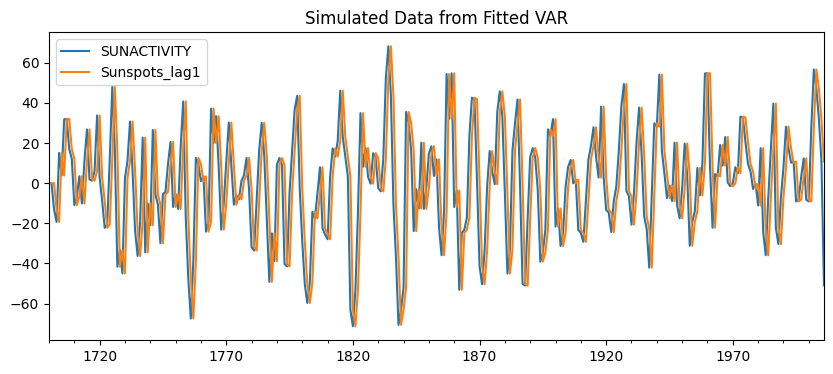

In [23]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

model = VAR(df)
lag_order_results = model.select_order(maxlags=100)
selected_lag = lag_order_results.aic

results = model.fit(maxlags=selected_lag) 
n_steps = len(df)
simulated = results.simulate_var(steps=n_steps)

simulated_df = pd.DataFrame(simulated, columns=df.columns)
simulated_df.index = pd.Index(pd.date_range(start='1700', periods=len(simulated_df), freq='A'))
simulated_df.plot(title="Simulated Data from Fitted VAR", figsize=(10, 4))
plt.show()

<Axes: >

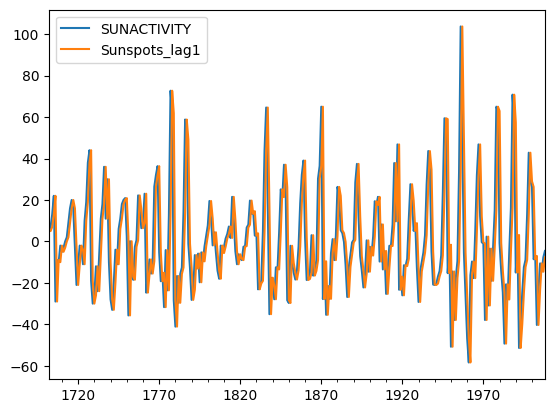

In [21]:
df.plot()